Nombres:


*   David Llanos
*   Daniel Blanco



In [28]:
#instalación del paquete para importación de planillas de excel
!pip install xlrd

In [29]:
#importaciones
import pandas as  pd

In [30]:
#importación del recurso excel, hoja de Beni, el header es la fila 7 y son 59 filas
excel = pd.read_excel('Bolivia - Produccion Año Agricola por Departamento, 1984 - 2023.xlsx', sheet_name='Beni', header=6, nrows=59)

#eliminar la columna A que no tiene información
excel = excel.drop('Unnamed: 0', axis=1)

#eliminar las columnas de años que no se utilizarán
excel = excel.drop(excel.iloc[:, 1:31], axis =1)

#limpiar las filas NA
excel = excel.dropna()

#resultado de la importación
excel


,DESCRIPCIÓN,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020(p),2020-2021(p),2021-2022(p),2022-2023(p)
1,CEREALES,71609.0,76159.0,77447.0,117684.0,120478.0,153765.000000,122507.490708,166892.762594,167862.670695,264570.659405
2,Arroz con cáscara,54816.0,58458.0,59496.0,99886.0,103088.0,137073.000000,105231.869817,122878.086047,124808.019313,152227.077990
3,Maíz en grano (1),15662.0,16497.0,16718.0,16977.0,16686.0,15785.000000,16385.458654,42113.547471,41727.895120,111330.601161
4,Sorgo en grano (1),1120.0,1192.0,1221.0,807.0,685.0,889.000000,873.444128,1008.886081,923.349521,854.190253
5,Trigo (1),11.0,12.0,12.0,14.0,19.0,19.000000,16.718109,892.242996,403.406740,158.790000
7,ESTIMULANTES,458.0,467.0,477.0,503.0,490.0,496.000000,488.110403,487.168417,492.799336,592.817435
8,Cacao,372.0,359.0,367.0,402.0,384.0,384.000000,380.118285,379.833329,386.120248,469.820678
9,Café,86.0,108.0,110.0,101.0,106.0,112.000000,107.992118,107.335089,106.679088,122.996757
11,FRUTALES,66041.0,68882.0,70772.0,80987.0,81069.0,85572.000000,79096.299028,78344.250718,81030.393141,88739.156619
12,Banano,5325.0,5697.0,5833.0,6228.0,6236.0,6527.000000,6468.245769,6430.056597,6377.784492,7223.603564


In [31]:
#Estructuramos el dataframe para hacerlo más tratable creando una columna llamada Grupo

#nueva columna grupo
excel['Grupo'] = None
#último grupo iterado
grupo_actual = None

#se itera todo el df
for index, row in excel.iterrows():
    #instrucción para iterar el grupo
    if row['DESCRIPCIÓN'] in ["CEREALES", "ESTIMULANTES", "FRUTALES", "HORTALIZAS", "OLEAGINOSAS E INDUSTRIALES", "TUBÉRCULOS Y RAICES"]:
        grupo_actual = row['DESCRIPCIÓN']
    #asignación del grupo en la columna "grupo"
    else:
        excel.at[index, 'Grupo'] = grupo_actual

# Filtrar las filas de productos únicamente
productos_df = excel[excel['Grupo'].notnull()]

# Nuevo df con productos y grupos en una nueva columna
print(productos_df.head())

          DESCRIPCIÓN  2013-2014  2014-2015  2015-2016  2016-2017  2017-2018  \
2   Arroz con cáscara    54816.0    58458.0    59496.0    99886.0   103088.0   
3   Maíz en grano (1)    15662.0    16497.0    16718.0    16977.0    16686.0   
4  Sorgo en grano (1)     1120.0     1192.0     1221.0      807.0      685.0   
5           Trigo (1)       11.0       12.0       12.0       14.0       19.0   
8               Cacao      372.0      359.0      367.0      402.0      384.0   

   2018-2019   2019-2020(p)   2020-2021(p)   2021-2022(p)   2022-2023(p)  \
2   137073.0  105231.869817  122878.086047  124808.019313  152227.077990   
3    15785.0   16385.458654   42113.547471   41727.895120  111330.601161   
4      889.0     873.444128    1008.886081     923.349521     854.190253   
5       19.0      16.718109     892.242996     403.406740     158.790000   
8      384.0     380.118285     379.833329     386.120248     469.820678   

          Grupo  
2      CEREALES  
3      CEREALES  
4      C

In [32]:
# Desarrollo de la pregunta 1:

productos_df_grupo=productos_df

# Filtrar filas que son productos y no grupos
productos_df_grupo = excel[excel['Grupo'].notnull()]

# Seleccionar el último año de interés
ultimo_anio = "2022-2023(p)"

# Encontrar el producto con la mayor producción por grupo
resultado = productos_df_grupo.loc[productos_df_grupo.groupby('Grupo')[ultimo_anio].idxmax(), ['Grupo', 'DESCRIPCIÓN', ultimo_anio]]

# Mostrar el resultado
print("Producto con mayor producción en el último año por grupo:")
print(resultado)

Producto con mayor producción en el último año por grupo:
                         Grupo        DESCRIPCIÓN   2022-2023(p)
2                     CEREALES  Arroz con cáscara  152227.077990
8                 ESTIMULANTES              Cacao     469.820678
23                    FRUTALES            Plátano   63547.420556
40                  HORTALIZAS             Tomate     706.421474
47  OLEAGINOSAS E INDUSTRIALES     Caña de Azúcar   52928.580000
58         TUBÉRCULOS Y RAICES               Yuca   43908.587186


In [33]:
# Desarrollo de la pregunta 2:

# Calcular el crecimiento porcentual por grupo
productos_df['Crecimiento'] = (productos_df['2022-2023(p)'] - productos_df['2013-2014']) / productos_df['2013-2014'] * 100

# Agrupar por 'Grupo' y obtener el promedio de crecimiento
grupo_crecimiento = productos_df.groupby('Grupo')['Crecimiento'].mean()

# Encontrar el grupo con mayor crecimiento
grupo_max_crecimiento = grupo_crecimiento.idxmax()
print("El grupo que ha experimentado mayor crecimiento en los últimos 10 años es:",grupo_max_crecimiento)

El grupo que ha experimentado mayor crecimiento en los últimos 10 años es: FRUTALES


<ipython-input-33-ae6b6409f642>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  productos_df['Crecimiento'] = (productos_df['2022-2023(p)'] - productos_df['2013-2014']) / productos_df['2013-2014'] * 100


In [34]:
# Desarrollo de la pregunta 2.1:

# Filtrar los datos del grupo 'FRUTALES'
frutales = productos_df[productos_df['Grupo'] == 'FRUTALES']

# Identificar el producto con mayor producción en 2022-2023
max_produccion_producto = frutales.loc[frutales['2022-2023(p)'].idxmax(), 'DESCRIPCIÓN']

print("El producto agrícola con mayor registro de producción en el grupo de 'FRUTALES' para el año 2022-2023 es:",max_produccion_producto)


El producto agrícola con mayor registro de producción en el grupo de 'FRUTALES' para el año 2022-2023 es: Plátano


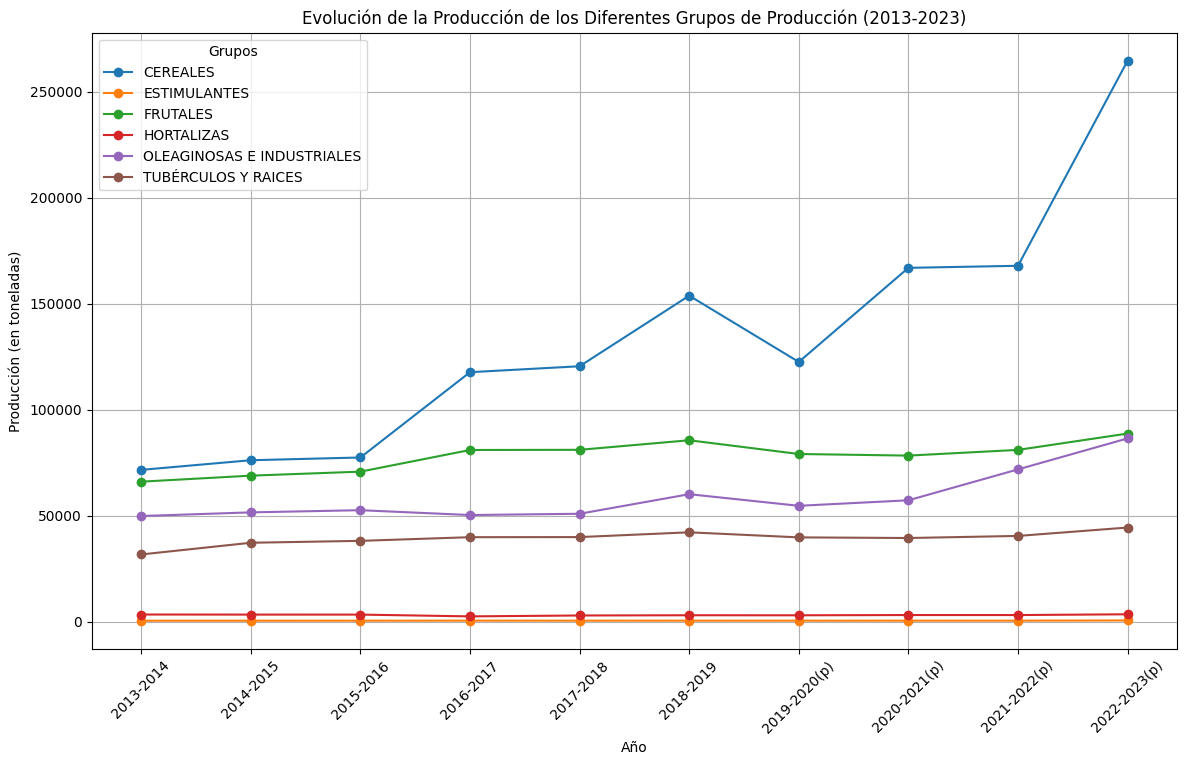

In [35]:
# Desarrollo de la pregunta 3:

import pandas as pd
import matplotlib.pyplot as plt

# Columnas de años que vamos a considerar
anios = ['2013-2014', '2014-2015', '2015-2016', '2016-2017', '2017-2018', '2018-2019', '2019-2020(p)', '2020-2021(p)', '2021-2022(p)', '2022-2023(p)']

# Agrupar por 'Grupo' y sumar la producción por cada año
grupo_produccion = productos_df.groupby('Grupo')[anios].sum()

# Crear el gráfico
plt.figure(figsize=(14, 8))

for grupo in grupo_produccion.index:
    plt.plot(anios, grupo_produccion.loc[grupo], marker='o', label=grupo)

# Etiquetas y título del gráfico
plt.xlabel('Año')
plt.ylabel('Producción (en toneladas)')
plt.title('Evolución de la Producción de los Diferentes Grupos de Producción (2013-2023)')
plt.legend(title='Grupos')
plt.grid(True)
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()